# 1.Load the dataset (5 points) a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

In [0]:
import pandas as pd
import numpy as np

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [0]:
df = pd.read_csv('drive/My Drive/AIML/blogtext.csv')

In [4]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [0]:
#dropping the date column
df=df.drop("date",axis=1)

In [6]:
df.head()

,id,gender,age,topic,sign,text
0,2059027,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,These are the team members: Drewe...
2,2059027,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [7]:
#number of unique id value counts
df.id.value_counts()

449628     4221
734562     2301
589736     2294
1975546    2261
958176     2244
           ... 
3993280       1
3483063       1
4165047       1
3575447       1
3599127       1
Name: id, Length: 19320, dtype: int64

In [8]:
#choosing the data - unique id who have witten more than 1500 blogs are choosen
blogtext_count = df["id"].value_counts()
index = blogtext_count[blogtext_count >1500].index.tolist()
df_new = df[(df['id'].isin(index))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(681284, 6)
The new data frame shape:	(38028, 6)


In [0]:
df_new=df_new.reset_index()

In [10]:
df_new=df_new.drop("index",axis=1)
df_new.head(10)

,id,gender,age,topic,sign,text
0,589736,male,35,Technology,Aries,Much funny. 2 points. As mentioned in the...
1,589736,male,35,Technology,Aries,"Harpers, Harpers, everywhere. Harpers, Har..."
2,589736,male,35,Technology,Aries,"In an earlier post, Johnathan said: 'And ..."
3,589736,male,35,Technology,Aries,"I'd post this on the RTG Blog, but I can't..."
4,589736,male,35,Technology,Aries,The answer to the first question lies with ...
5,589736,male,35,Technology,Aries,it seems odd to think of brother ian as hav...
6,589736,male,35,Technology,Aries,since our next game is the weekend of hallo...
7,589736,male,35,Technology,Aries,"- Hillsfar, ruled by Lord Malthiir, believe..."
8,589736,male,35,Technology,Aries,"It's okay, rock lobster. All is well. If ..."
9,589736,male,35,Technology,Aries,perhaps we can have it that if an email is ...


In [0]:
#taking a sample of 30000 records and saving in df1, so that we can avoid memory issues.
df1=df_new.sample(30000)

In [12]:
df1.head(10)

,id,gender,age,topic,sign,text
6786,1093691,male,17,Technology,Taurus,Hopefully. Some of us poor soul's m...
33334,1107146,female,16,Student,Libra,The only thing anyone can do ...
32158,1107146,female,16,Student,Libra,And you reminded me of that little phra...
36000,1975546,female,23,indUnk,Aries,"is like a very, very good afterscho..."
28364,1078410,male,16,indUnk,Cancer,Update: well I recently finished Ch...
32716,1107146,female,16,Student,Libra,"I'm home, but I'm going back ..."
31365,942828,female,34,indUnk,Cancer,The Solemnity of the Most Sa...
29343,1078410,male,16,indUnk,Cancer,Thomas Hamil interview http://ww...
6666,1093691,male,17,Technology,Taurus,This is starting to turn into a one...
585,589736,male,35,Technology,Aries,done and done.


In [0]:
df1=df1.reset_index()

In [14]:
df1=df1.drop("index",axis=1)
df1.head(10)

,id,gender,age,topic,sign,text
0,1093691,male,17,Technology,Taurus,Hopefully. Some of us poor soul's m...
1,1107146,female,16,Student,Libra,The only thing anyone can do ...
2,1107146,female,16,Student,Libra,And you reminded me of that little phra...
3,1975546,female,23,indUnk,Aries,"is like a very, very good afterscho..."
4,1078410,male,16,indUnk,Cancer,Update: well I recently finished Ch...
5,1107146,female,16,Student,Libra,"I'm home, but I'm going back ..."
6,942828,female,34,indUnk,Cancer,The Solemnity of the Most Sa...
7,1078410,male,16,indUnk,Cancer,Thomas Hamil interview http://ww...
8,1093691,male,17,Technology,Taurus,This is starting to turn into a one...
9,589736,male,35,Technology,Aries,done and done.


In [0]:
result=[]

In [0]:
#removing rows which have less than 150 chars in the column "text' in the dataframe
for i in range(0,30000):
  if len(df1.text[i])>150:
    result.append("True")
  else:
    result.append("False")

In [0]:
df1['result']=result

In [18]:
df1.head()

,id,gender,age,topic,sign,text,result
0,1093691,male,17,Technology,Taurus,Hopefully. Some of us poor soul's m...,True
1,1107146,female,16,Student,Libra,The only thing anyone can do ...,True
2,1107146,female,16,Student,Libra,And you reminded me of that little phra...,True
3,1975546,female,23,indUnk,Aries,"is like a very, very good afterscho...",False
4,1078410,male,16,indUnk,Cancer,Update: well I recently finished Ch...,True


In [0]:
df2=df1[df1.result != 'False']

In [0]:
df2=df2.reset_index()

In [21]:
df2=df2.drop(["index","result"],axis=1)
df2.head(10)

,id,gender,age,topic,sign,text
0,1093691,male,17,Technology,Taurus,Hopefully. Some of us poor soul's m...
1,1107146,female,16,Student,Libra,The only thing anyone can do ...
2,1107146,female,16,Student,Libra,And you reminded me of that little phra...
3,1078410,male,16,indUnk,Cancer,Update: well I recently finished Ch...
4,1107146,female,16,Student,Libra,"I'm home, but I'm going back ..."
5,942828,female,34,indUnk,Cancer,The Solemnity of the Most Sa...
6,1078410,male,16,indUnk,Cancer,Thomas Hamil interview http://ww...
7,1093691,male,17,Technology,Taurus,This is starting to turn into a one...
8,605396,male,35,indUnk,Scorpio,Northwest is offering a great deal ...
9,1093457,male,16,Technology,Virgo,Dream Job: Self-employed computer e...


In [22]:
df2.shape #Final Data shape that is used in the model

(20059, 6)

# 2.Preprocess rows of the “text” column (7.5 points)
### Remove unwanted characters
### Convert text to lowercase
### Remove unwanted spaces
### Remove stopwords


In [0]:
#converting to lower case 
df2['text'] = df2['text'].str.lower()

In [24]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def rem_punc(text):
    no_punc="".join([c for c in text if c not in string.punctuation])
    return no_punc

In [0]:
df2['text']=df2['text'].apply(lambda x: rem_punc(x)) #removing punctuation

In [0]:
import re
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [0]:
df2['text'] = df2['text'].apply(keepAlpha) #removing extra space and chars

In [29]:
df2.text[10]

'numb by linkin park im tired of being what you want me to be feeling so faithless lost under the surface i dont know what youre expecting of me put under the pressure of walking in your shoes caught in the undertow just caught in the undertow every breath that i take is another mistake to you caught in the undertow just caught in the undertow ive become so numb i cant feel you there become so tired so much more aware im becoming this all i want to do is be more like me and be less like you cant you see that youre smothering me holding too tightly afraid to lose control cuz everything that you thought i would be has fallen apart right in front of you caught in the undertow just caught in the undertow every step that i take is another mistake to you caught in the undertow just caught in the undertow and every second i waste is more than i can take ive become so numb i cant feel you there become so tired so much more aware im becoming this all i want to do is be more like me and be less 

In [0]:
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("", sentence)
df2['text'] = df2['text'].apply(removeStopWords) #removing stop words

In [31]:
df2.text[10]

'numb linkin park im tired want feeling faithless lost surface dont know youre expecting put pressure walking shoes caught undertow caught undertow every breath take another mistake caught undertow caught undertow ive become numb cant feel become tired much aware im becoming want like less like cant see youre smothering holding tightly afraid lose control cuz everything thought would fallen apart right front caught undertow caught undertow every step take another mistake caught undertow caught undertow every second waste take ive become numb cant feel become tired much aware im becoming want like less like know may end failing know like someone disappointed ive become numb cant feel ive become tired much aware im becoming want like less like ive become numb im tired want ive become numb im tired want someone needs this'

# 3.As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)

In [32]:
df2.shape

(20059, 6)

In [33]:
df2.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
text      0
dtype: int64

In [0]:
df3 = df2.assign(labels = df2.gender.astype(str) + ', ' + \
  df2.age.astype(str) + ', ' + df2.topic.astype(str) + ', '+ \
  df2.sign.astype(str))

In [35]:
df3.head()

,id,gender,age,topic,sign,text,labels
0,1093691,male,17,Technology,Taurus,hopefully us poor souls might stay extra year ...,"male, 17, Technology, Taurus"
1,1107146,female,16,Student,Libra,thing anyone pray yes know weird sounds coming...,"female, 16, Student, Libra"
2,1107146,female,16,Student,Libra,reminded little phrase well got back together ...,"female, 16, Student, Libra"
3,1078410,male,16,indUnk,Cancer,update well recently finished chobits manga mu...,"male, 16, indUnk, Cancer"
4,1107146,female,16,Student,Libra,im home im going back hospital minutes clothes...,"female, 16, Student, Libra"


In [0]:
df3=df3.drop(labels=['gender','age','topic','sign'],axis=1)

In [37]:
df3.head()

,id,text,labels
0,1093691,hopefully us poor souls might stay extra year ...,"male, 17, Technology, Taurus"
1,1107146,thing anyone pray yes know weird sounds coming...,"female, 16, Student, Libra"
2,1107146,reminded little phrase well got back together ...,"female, 16, Student, Libra"
3,1078410,update well recently finished chobits manga mu...,"male, 16, indUnk, Cancer"
4,1107146,im home im going back hospital minutes clothes...,"female, 16, Student, Libra"


# 4.Separate features and labels, and split the data into training and testing (5 points)

In [0]:
X = df3.drop(labels = ['id','labels'], axis=1)
y = df3.drop(labels = ['id','text'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.text,y.labels,test_size=0.3, random_state=10, shuffle=True)

In [40]:
#printing the train and test sets
X_train.head()

11081    success holy smokes bought brother got back me...
19915    ebay scare like mix especially im bored work t...
17324    nu trainers arrived r soooo cool need bt weari...
10003    ok brother coming home christmas gone back del...
19449    ok new hero igor florres came last tour de fra...
Name: text, dtype: object

In [41]:
y_train.head()

11081       female, 26, indUnk, Cancer
19915         male, 36, Fashion, Aries
17324    female, 16, Student, Aquarius
10003       female, 48, indUnk, Pisces
19449       female, 48, indUnk, Pisces
Name: labels, dtype: object

In [42]:
X_test.head()

18216    listening story urllink nprs things considered...
11978    agree jackie print amusing stories wider range...
5218     good luck interview hope strategies relevant r...
19598    songwhich addridden brain trying learn right s...
9511     ok gail mms screenplay projected blend followi...
Name: text, dtype: object

In [43]:
y_test.head()

18216         male, 35, indUnk, Scorpio
11978    female, 17, Student, Capricorn
5218          female, 23, indUnk, Aries
19598      male, 17, Non-Profit, Gemini
9511         female, 48, indUnk, Pisces
Name: labels, dtype: object

# 5.Vectorize the features (5 points)

In [0]:
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [0]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vectorizer.fit_transform(X_train)

In [0]:
X_test_dtm = vectorizer.transform(X_test)

In [47]:
X_train_dtm.shape

(14041, 652197)

In [48]:
X_test_dtm.shape

(6018, 652197)

# 6.Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference (5 points)

In [0]:
count_gender = df1['gender'].value_counts().to_dict()
count_age = df1['age'].value_counts().to_dict()
count_topic = df1['topic'].value_counts().to_dict()
count_sign = df1['sign'].value_counts().to_dict()

In [50]:
dictlabels = {**count_gender , **count_age, **count_topic, **count_sign}
print(dictlabels)

{'female': 16889, 'male': 13111, 16: 7212, 34: 4924, 17: 4230, 23: 3328, 35: 2989, 24: 1810, 38: 1686, 26: 1334, 36: 1264, 48: 1223, 'indUnk': 15040, 'Student': 5865, 'Technology': 4239, 'Arts': 1810, 'Non-Profit': 1782, 'Fashion': 1264, 'Aries': 9528, 'Cancer': 4348, 'Libra': 3568, 'Virgo': 2903, 'Scorpio': 2747, 'Gemini': 1782, 'Aquarius': 1453, 'Capricorn': 1241, 'Pisces': 1223, 'Taurus': 1207}


# 7.Transform the labels - (7.5 points)

In [0]:
# transform to dictionary
y_train = [set(i.split(',')) for i in y_train]
y_test = [set(i.split(',')) for i in y_test]

In [0]:
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

In [53]:
y_train[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0])

In [54]:
print("classes = ",mlb.classes_)

classes =  [' 16' ' 17' ' 23' ' 24' ' 26' ' 34' ' 35' ' 36' ' 38' ' 48' ' Aquarius'
 ' Aries' ' Arts' ' Cancer' ' Capricorn' ' Fashion' ' Gemini' ' Libra'
 ' Non-Profit' ' Pisces' ' Scorpio' ' Student' ' Taurus' ' Technology'
 ' Virgo' ' indUnk' 'female' 'male']


# 8.Choose a classifier - (5 points)

In [0]:
clf = LogisticRegression(solver ='liblinear',max_iter=1000) #choosing solver as liblinear as we are doing multi class classifier.
clf = OneVsRestClassifier(clf)

# 9. Fit the classifier, make predictions and get the accuracy (5 points)

In [56]:
clf.fit(X_train_dtm,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predict = clf.predict(X_test_dtm)
print("Classification Report")
print(classification_report(y_test, y_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.43      0.49      1452
           1       0.36      0.29      0.32       887
           2       0.52      0.26      0.35       556
           3       0.01      0.00      0.01       250
           4       0.95      0.26      0.41       279
           5       0.94      0.69      0.80      1042
           6       0.49      0.27      0.35       560
           7       0.95      0.42      0.59       299
           8       0.84      0.39      0.53       353
           9       0.96      0.84      0.89       340
          10       0.97      0.66      0.78       337
          11       0.73      0.54      0.62      1639
          12       0.01      0.00      0.01       250
          13       0.93      0.63      0.75       986
          14       0.04      0.03      0.03       242
          15       0.95      0.42      0.59       299
          16       0.13      0.09      0.11       373
     

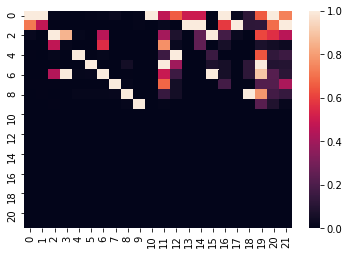

In [58]:
import seaborn as sns  ##just tried how the heat map looks, - inconclusive
val_cm = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sns.heatmap(scaler.fit_transform(val_cm))

In [59]:
 print("Accuracy score",metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.292123629112662


# **10.Print true label and predicted label for any five examples (7.5 points)**

In [66]:
y_test_pred_inversed = mlb.inverse_transform(y_predict)
y_test_inversed = mlb.inverse_transform(y_test)
for i in range(10,15):
    print('True labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        (y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))

True labels:	(' 23', ' Aries', ' indUnk', 'female')
Predicted labels:	 35, Aries, Technology,male


True labels:	(' 34', ' Cancer', ' indUnk', 'female')
Predicted labels:	 34, Cancer, indUnk,female


True labels:	(' 17', ' Gemini', ' Non-Profit', 'male')
Predicted labels:	 16,female


True labels:	(' 16', ' Aquarius', ' Student', 'female')
Predicted labels:	 16, Aquarius, Student,female


True labels:	(' 35', ' Aries', ' Technology', 'male')
Predicted labels:	 23, Aries, indUnk,female




In [0]:
## model is performing fairly, the accuracy can further be tuned by pre processing.